In [1]:
import numpy as np
import numpy.linalg as LA
import numpy.random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Given constant values

K = 0.05
p_t = 3 

In [3]:
def f(x):
    return (x/(1 - x)) * np.sqrt(2 * p_t / (2 + x)) - K


In [4]:
def error(a,b):
    return abs((a - b) / (a)) * 100

In [5]:
# E_s = Error threshold epsillon

def secant(f, a, b, E_s, max_iteration):
    count = 0
    
    # Both the first estimation of the root are on the same side !!
    if(f(a) * f(b) >= 0):
        print("secant method failed")
        #return None
  
    for n in range(1, max_iteration + 1):
        count += 1
        ans = a - (f(a) * (b-a)) / (f(b) - f(a))
        if(error(ans, b) <= E_s):
            print(TCYAN + "solution found")
            return (ans, count)
        a = b
        b = ans
        
    return (a, count)

In [6]:
# E_s = Error threshold epsillon

def False_Position_Method(f,a,b,E_s,max_iteration):
    old_ans = 0
    count = 0
    if(f(a) * f(b) >= 0):
        print(TRED + "False Position Method failed")
        #return None

    for n in range(1, max_iteration + 1):
        count += 1
        ans = a - (f(a) * (b - a)) / (f(b) - f(a))
       
        if(error(ans, old_ans) <= E_s):
            print("solution found")
            return (ans, count)
        
        if(f(a) * f(ans) < 0):
            b = ans
            old_ans = b
        elif(f(b) * f(ans) < 0):
            a = ans
            old_ans = a
        elif(f(ans) == 0):
            return (ans, count)
        else:
            print("False Position Method failed")
            return None
    
    return (a - (f(a)(b-a)) / (f(b) - f(a)), count)

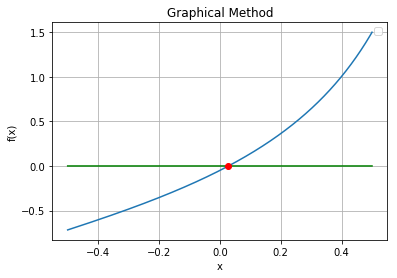

In [7]:
x = np.arange(-0.5, 0.5, 0.0001)

y = (x / (1 - x)) * np.sqrt(2 * p_t / (2 + x)) - K

plt.plot(x,y)
z = x * 0
plt.plot(x, z, color = "green")

idx = np.argwhere(np.diff(np.sign(y - z))).flatten()

plt.plot(x[idx], y[idx], "ro")

plt.legend() 
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graphical Method")
plt.grid()
plt.show()

In [8]:
print("the graphically estimated solution is %.5f" %x[idx])

the graphically estimated solution is 0.02820


In [11]:
first_in_guess = input("Enter first initial guess of secant method ")
second_in_guess = input("Enter second initial guess of secant method ")
max_itr =  input("Enter maximum no of iteration ")

sec_ans , no_of_iteration = secant(f,float(first_in_guess), float(second_in_guess), 0.005,int(max_itr))

print("Solution by secant method is ", sec_ans)
print("No of iterations in secant method", no_of_iteration)

first_in_guess = input("Enter first initial guess of false position method ")
second_in_guess = input("Enter second initial guess of false position method ")
max_itr = input("Enter maximum no of iteration")

fpm_ans , no_of_iteration = False_Position_Method(f, float(first_in_guess), float(second_in_guess), 
                                                  0.005, int(max_itr))
print("Solution by False Position Method is ", fpm_ans)
print("No of iterations in False Position Method ", no_of_iteration)

Enter first initial guess of secant method 4
Enter second initial guess of secant method 5
Enter maximum no of iteration 100


/Users/Safayet/anaconda3/envs/Data_Analysis/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/Users/Safayet/anaconda3/envs/Data_Analysis/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


secant method failed
('Solution by secant method is ', nan)
('No of iterations in secant method', 100)
Enter first initial guess of false position method -2
Enter second initial guess of false position method -1
Enter maximum no of iteration100


ZeroDivisionError: float division by zero